In [1]:
import pandas as pd

# Load the dataset
titanic_data = pd.read_csv("C:/Users/hp/Downloads/train.csv")

# Display the first few rows
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Check for missing values
print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Fill missing values in Age with median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing values in Embarked with mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


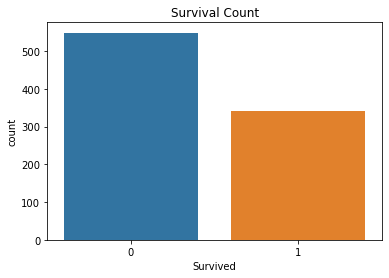

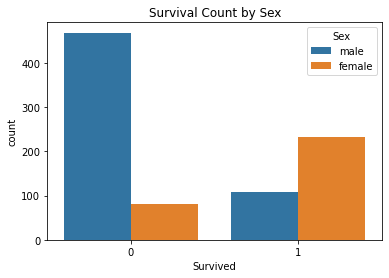

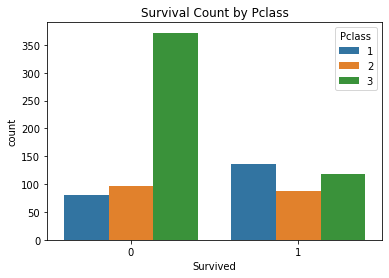

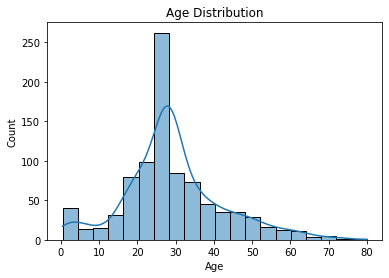

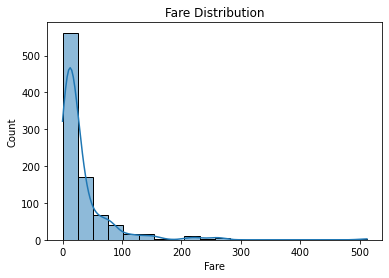

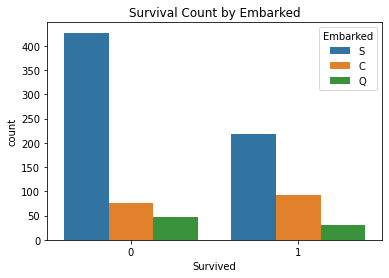

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA
# Survival count
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

# Survival count by sex
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Count by Sex')
plt.show()

# Survival count by Pclass
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Count by Pclass')
plt.show()

# Age distribution
sns.histplot(titanic_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
sns.histplot(titanic_data['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()

# Survival count by Embarked
sns.countplot(x='Survived', hue='Embarked', data=titanic_data)
plt.title('Survival Count by Embarked')
plt.show()


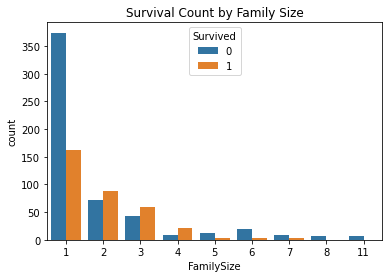

In [6]:
# Create a new feature FamilySize
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Plotting
sns.countplot(x='FamilySize', hue='Survived', data=titanic_data)
plt.title('Survival Count by Family Size')
plt.show()


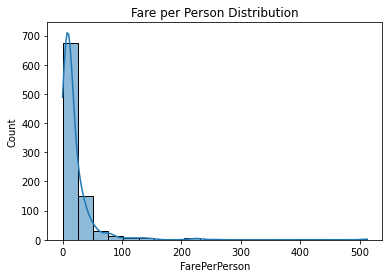

In [7]:
# Calculate fare per person
titanic_data['FarePerPerson'] = titanic_data['Fare'] / titanic_data['FamilySize']

# Plotting
sns.histplot(titanic_data['FarePerPerson'], bins=20, kde=True)
plt.title('Fare per Person Distribution')
plt.show()


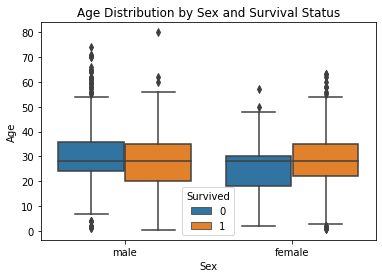

In [8]:
# Age and Sex Analysis
sns.boxplot(x='Sex', y='Age', hue='Survived', data=titanic_data)
plt.title('Age Distribution by Sex and Survival Status')
plt.show()


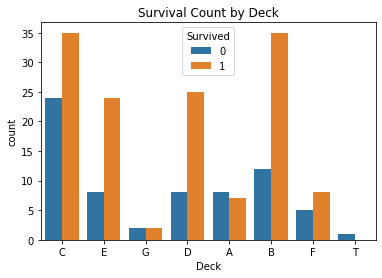

In [9]:
# Extract Deck information from Cabin
titanic_data['Deck'] = titanic_data['Cabin'].str[:1]

# Plotting
sns.countplot(x='Deck', hue='Survived', data=titanic_data)
plt.title('Survival Count by Deck')
plt.show()
